### GAIA optimiation DBSCAN with MCMC scheme

1. using a simple ABC scheme
2. ...

In [ ]:
using PyCall
using Distributions
using Statistics , StatsBase

using Distances
using Random

push!(LOAD_PATH,"/home/stephane/Science/cluster/GAIA/master/src")
using GaiaClustering

import PyPlot


## directory
rootdir = "/home/stephane/Science/cluster/GAIA"
wdir    = "/home/stephane/Science/cluster/GAIA/products"

cd(wdir)

In [ ]:
function getdata(filevot)
    voname = filevot

    data       = read_votable(voname)
    df         = filter_data(data)
    dfcart     = add_cartesian(df)
    blck       = [[1,2,3],[4,5], [6,7,8]]
    wghtblck   = [4.0,5.0,1.0]
    norm       = "identity"

    dfcartnorm , scale8 = normalization_PerBlock(dfcart, blck, wghtblck , norm, false) 
    return(dfcartnorm , dfcart)
end

## Main ...
## Votable test.vot read
## Filtering done ...
## Stars selected: 5382
## Cartesian transformation done ...
## Normalization identity done...
### [1pc,1pc,1pc,1km/s,1km/s,1mag,1mag] equivalent to [0.398015, 0.398015, 0.398015, 0.497519, 0.497519, 0.0995037, 0.0995037, 0.0995037]
## MCMC : Q minimum  = 2.4
## MCMC : N stars minimum = 40
## MCMC : iterations = 100
### init done ...
### mini stats...
### Qc : 3.043640671761914
### Qn : 83.65
### burnout done...
## MCMC done.
## Stats:

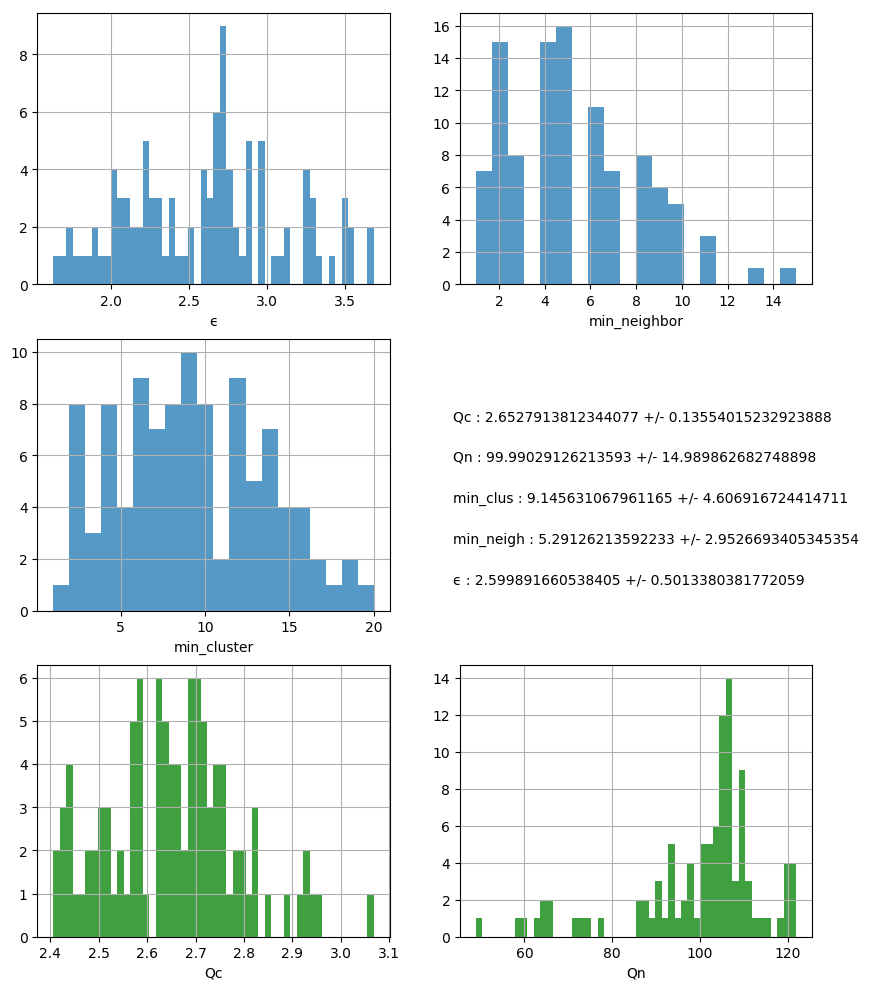


ϵ : 2.599891660538405 +/- 0.5013380381772059
min_nei  : 5.29126213592233 +/- 2.9526693405345354
min_clus  : 9.145631067961165+/- 4.606916724414711
Qn  : 99.99029126213593 +/- 14.989862682748898
Qc  : 2.6527913812344077 +/- 0.13554015232923888


In [4]:
### main loop

function main(params::GaiaClustering.abc)
    Random.seed!(1237)
    println("## Main ...")
    
    ## Get the cluster data..
    dfnorm , dfcart = getdata("test.vot")
    
    ## run the mcmc for the dbscan parameters

    println("## MCMC : Q minimum  = ", params.minQ)
    println("## MCMC : N stars minimum = ", params.minstars)
    println("## MCMC : iterations = ", params.niter)
    mc = abc_mcmc_dbscan(dfnorm, dfcart, params)
    
    println("## MCMC done.")
    
    ## plots ################################
    
    PyPlot.plt[:figure](figsize=(10.0,12.0))

    
    nbins = 50
    PyPlot.plt[:subplot](3, 2, 1  )
    h = PyPlot.plt[:hist](mc.eps,nbins, alpha=0.75)
    PyPlot.plt[:xlabel]("ϵ")
    PyPlot.plt[:grid](true)
    
    nbins = 20
    PyPlot.plt[:subplot](3, 2, 2 )
    h = PyPlot.plt[:hist](mc.mne,nbins, alpha=0.75)
    PyPlot.plt[:xlabel]("min_neighbor")  
    PyPlot.plt[:grid](true)
    
    nbins = 20
    PyPlot.plt[:subplot](3, 2, 3 )
    h = PyPlot.plt[:hist](mc.mcl,nbins, alpha=0.75)
    PyPlot.plt[:xlabel]("min_cluster") 
    PyPlot.plt[:grid](true)
    
    ### text 
    PyPlot.plt[:subplot](3, 2, 4)
    PyPlot.plt[:axis]("off")
    vtext  = mean(mc.eps)
    v2text = std(mc.eps)
    txt = "ϵ : $vtext +/- $v2text "
    PyPlot.plt[:text](-0.02,0.1,txt)
    
    vtext  = mean(mc.mne)
    v2text = std(mc.mne)
    txt = "min_neigh : $vtext +/- $v2text "
    PyPlot.plt[:text](-0.02,0.25,txt)  
    
    vtext  = mean(mc.mcl)
    v2text = std(mc.mcl)
    txt = "min_clus : $vtext +/- $v2text "
    PyPlot.plt[:text](-0.02,0.4,txt)    
    
    vtext  = mean(mc.qn)
    v2text = std(mc.qn)
    txt = "Qn : $vtext +/- $v2text "
    PyPlot.plt[:text](-0.02,0.55,txt)
    
    vtext  = mean(mc.qc)
    v2text = std(mc.qc)
    txt = "Qc : $vtext +/- $v2text "
    PyPlot.plt[:text](-0.02,0.7,txt)
    
    #######
    
    nbins = 50
    PyPlot.plt[:subplot](3, 2, 6 )
    PyPlot.plt[:axis]("on")
    h = PyPlot.plt[:hist](mc.qn,nbins, color = "g", alpha=0.75)
    PyPlot.plt[:xlabel]("Qn")     
    PyPlot.plt[:grid](true)
    
    nbins = 50
    PyPlot.plt[:subplot](3, 2, 5 )
    h = PyPlot.plt[:hist](mc.qc,nbins, color="g", alpha=0.75)
    PyPlot.plt[:grid](true)

    PyPlot.plt[:xlabel]("Qc") 
    PyPlot.plt[:savefig]("dbscan-abc.png")
    PyPlot.plt[:show]()
    
    ## Stats
    println("## Stats:")
    println("ϵ : ",mean(mc.eps)," +/- ", std(mc.eps))
    println("min_nei  : ",mean(mc.mne)," +/- ", std(mc.mne))
    println("min_clus  : ",mean(mc.mcl),"+/- ", std(mc.mcl))
    println("Qn  : ",mean(mc.qn)," +/- ", std(mc.qn)) 
    println("Qc  : ",mean(mc.qc)," +/- ", std(mc.qc)) 
    
    
    
end

### main 
minQ    = 2.4
minstars = 40
##
epsmean = 1.0
epsdisp = 1.5
min_nei   = 5
min_cl    = 10
ncoredisp = 5
##
nburnout  = 100
niter     = 100
pinit = GaiaClustering.abc(minQ, minstars, epsmean,epsdisp,min_nei, min_cl, ncoredisp, nburnout , niter)
##
main(pinit)